In [1]:
!pip install svgutils

In [2]:
from fig_auto_assembler import SVGFIG, return_sizes, cm2inch

In [3]:
import sys, os
import numpy as np
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=2)
sns.set_style("white")
%matplotlib inline

In [4]:
a4_width_cm, a4_height_cm = return_sizes()

In [5]:
a4_width_cm, a4_height_cm

(21, 29.7)

In [62]:
fw, fh = a4_width_cm, 2 * a4_height_cm / 3
fw_dict = dict(); fh_dict = dict()
fw_dict["A"], fh_dict["A"] =   fw,  fh / 3
fw_dict["B"], fh_dict["B"] =   fw / 2,  2*fh / 3
fw_dict["C"], fh_dict["C"] =   fw / 2,  2*fh / 3
command = "Av(BhC)"
figdir = "."
figname = os.path.join(figdir, "outline.svg")
svgfig = SVGFIG(figname, fw, fh, fw_dict, fh_dict, command)

# Figure A

In [63]:
from matplotlib import gridspec
import seaborn as sns

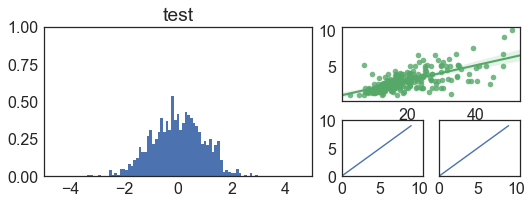

In [85]:
label = "A"
fname, w, h = svgfig.get_figinfo(label)
fig = plt.figure(figsize=cm2inch(w, h))
# gridspec inside gridspec
# outer_grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)
gs0 = gridspec.GridSpec(nrows=1, ncols=1)
gs0.update(left=0.1, right=0.55, top=0.9, bottom=0.1, wspace=0.5)
ax = plt.Subplot(fig, gs0[0])
ax.set_title("test")
ax.set_ylim(0, 1); ax.set_xlim(-5, 5)
x = np.random.normal(size=1000)
ax.hist(x, bins=np.linspace(-5, 5, 100), normed=True)
fig.add_subplot(ax)
gs1 = gridspec.GridSpec(nrows=1, ncols=1)
gs1.update(left=0.6, right=0.9, top=0.9, bottom=0.5, wspace=0.5)
ax = plt.Subplot(fig, gs1[0])
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)
ax.set_ylabel(""); ax.set_xlabel("")
fig.add_subplot(ax)
gs2 = gridspec.GridSpec(nrows=1, ncols=2)
gs2.update(left=0.6, right=0.9, top=0.4, bottom=0.1, wspace=0.2)
for i in range(2):
    ax = plt.Subplot(fig, gs2[i])
    ax.set_xlim(0, 10.5); ax.set_xticks([0, 5, 10])
    ax.set_ylim(0, 10); ax.set_yticks([0, 5, 10]); ax.set_yticklabels([0, 5, 10])
    if i == 1:
        ax.set_yticks([0, 5, 10]); ax.set_yticklabels(["", "", ""])
    ax.plot(np.arange(10), np.arange(10))
    fig.add_subplot(ax)    
plt.savefig(fname, format="svg")    
#plt.savefig(fname, bbox_inches="tight", pad_inches=0.0, format="svg")

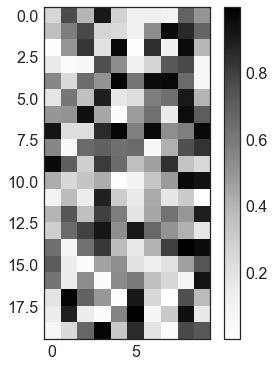

In [86]:
label = "B"
fname, w, h = svgfig.get_figinfo(label)
plt.figure(figsize=cm2inch(w, h))
mat = np.random.random(200).reshape(20, 10)
plt.imshow(mat)
plt.colorbar()
plt.tight_layout()
#plt.savefig(fname, bbox_inches="tight", pad_inches=0.0, format="svg")
plt.savefig(fname, format="svg")

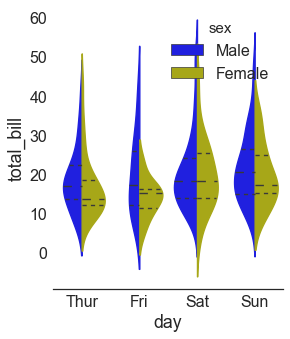

In [87]:
label = "C"
fname, w, h = svgfig.get_figinfo(label)
# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.figure(figsize=cm2inch(w, h))
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)
plt.savefig(fname, format="svg")

In [88]:
svgfig.assemble()

command_list:  ['A', 'B', 'C', 'h', 'v']
stack:  []
stack:  ['A']
stack:  ['A', 'B']
stack:  ['A', 'B', 'C']
stack:  ['A', 'tmp']


In [89]:
!open .